## 4339 - Asset Pricing and Investments Assignment 1

### Import packages

In [88]:
# Ensure packages are properly installed
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

### Exercise 4

In [195]:
yf = globals()["yf"]

# This function returns the unbiased estimator of volatility
# Equivalent to using the function "STDEV.S" in Excel
def vol_s(x):
    x = np.array(x)
    n = len(x)
    x_bar = np.mean(x)
    stdev = np.sqrt(
        np.sum((x - x_bar) ** 2) / (n - 1)
    )  # note that the sum of squared deviations is divided by (n-1)
    return stdev

# Annualize
def annualize_return(x):
    return (1 + x) ** 12 - 1
    # alternatively, one can use an approximation return 12*x


startdate = "1989-07-01"  # Define start date
startyear = startdate.split("-")[0]  # Split the string to extract start year
end_date_gspc = "2024-07-01"  # Define end dates
end_date_tnx = "2024-07-01"  # Define end dates

# Convert start and end dates to datetime objects
startdate_dt = datetime.datetime.strptime(startdate, "%Y-%m-%d")
end_date_gspc_dt = datetime.datetime.strptime(end_date_gspc, "%Y-%m-%d")
end_date_tnx_dt = datetime.datetime.strptime(end_date_tnx, "%Y-%m-%d")

# Download S&P 500 (^GSPC)
GSPC = yf.download("^GSPC", start=startdate_dt, end=end_date_gspc_dt, interval="1mo")

# Download 10-year US treasary bonds (^TNX)
TNX = yf.download("^TNX", start=startdate_dt, end=end_date_tnx_dt, interval="1mo")

# Normalize the time series so that the initial value is 100.
# Use the 'Adj Close' column, which takes care of other changes like dividend payout, splits, etc.
GSPC_N = (GSPC["Adj Close"] / GSPC["Adj Close"].iloc[0]) * 100
TNX_N = (TNX["Adj Close"] / TNX["Adj Close"].iloc[0]) * 100

# Compute the different portfolios
portfolio_80 = GSPC_N * 0.8 + TNX_N * 0.2  # 80% stocks and 20% bonds
portfolio_60 = GSPC_N * 0.6 + TNX_N * 0.4  # 60% stocks and 40% bonds
portfolio_40 = GSPC_N * 0.4 + TNX_N * 0.6  # 40% stocks and 60% bonds

target_date_fund = GSPC_N*0.4 + TNX_N*0.6
for x in range(len(GSPC_N)-1):
    stockweight = 0.9
    target_date_fund[x] = GSPC_N[x]*stockweight + TNX_N[x]*(1-stockweight)
    stockweight = stockweight - 0.5/(12*35)

# Merge the time series
prices_data = pd.concat(
    [
        GSPC_N,
        TNX_N,
        portfolio_80,
        portfolio_60,
        portfolio_40,
        target_date_fund
    ],
    axis=1,
)
prices_data.columns = [
    "GSPC_N",
    "TNX_N",
    "80/20_portfolio",
    "60/40_portfolio",
    "40/60_portfolio",
    "target_date_fund"
]

# Display the merged data
# print(prices_data.head())

# Calculate Returns from Prices
returns_data = prices_data.pct_change()

# Remove the first element which is N/A
returns_data = returns_data.dropna()
# print(returns_data.head())

# Calculate the 12-month rolling annualized mean
rollmean = returns_data.rolling(window=12).mean()  
annualized_rollmean = (1 + rollmean) ** 12 - 1  # Annualize the rolling mean

# Calculate the 12-month rolling annualized standard deviation
rollvol = returns_data.rolling(window=12).apply(vol_s, raw=True)
annualized_rollvol = rollvol * np.sqrt(12)  # Annualize the rolling volatility

# Display the results
# print("Annualized Rolling Mean:\n", annualized_rollmean.tail())
# print("\nAnnualized Rolling Volatility:\n", annualized_rollvol.tail())

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
/var/folders/l2/mtysj2ks2jbgt4w9dwn6kld40000gn/T/ipykernel_45036/3357175018.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_date_fund[x] = GSPC_N[x]*stockweight + TNX_N[x]*(1-stockweight)
/var/folders/l2/mtysj2ks2jbgt4w9dwn6kld40000gn/T/ipykernel_45036/3357175018.py:49: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  target_date_fund[x] = GSPC_N[x]*stockweight + TNX_N[x]*(1-stockweight)
/var/folders/l2/mtysj2ks2jbgt4w9dwn6kld40000gn/T/ipykernel_45036/3357175018.py:77: FutureWarning: The default fill_method='pad' in DataFrame.pct_chan

#### Display return on plot

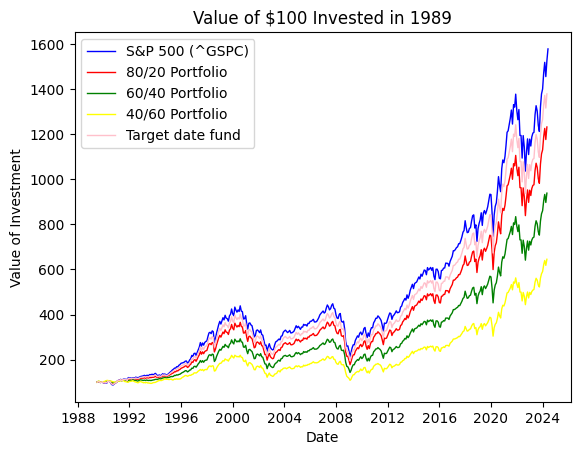

In [218]:
# Plot ^GSPC normalized prices
def plotReturn(key, label, color):
    plt.plot(
        prices_data.index,
        prices_data[key],
        label=label,
        color=color,
        linewidth=1,
    )

plotReturn("GSPC_N", "S&P 500 (^GSPC)", "blue")
plotReturn("80/20_portfolio", "80/20 Portfolio", "red")
plotReturn("60/40_portfolio", "60/40 Portfolio", "green")
plotReturn("40/60_portfolio", "40/60 Portfolio", "yellow")
plotReturn("target_date_fund", "Target date fund","pink")

plt.title(f"Value of $100 Invested in {startyear}")  # Add title
plt.xlabel("Date")  # Add x-label
plt.ylabel("Value of Investment")  # Add y-label
plt.legend(loc="upper left")  # Add legend
# plt.savefig("./fig1a.jpg") # Save figure
plt.show()  # Show plot

#### Display log returns on plot

/var/folders/l2/mtysj2ks2jbgt4w9dwn6kld40000gn/T/ipykernel_45036/456390518.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.log(prices_data[key]) - np.log(prices_data["target_date_fund"][0]),


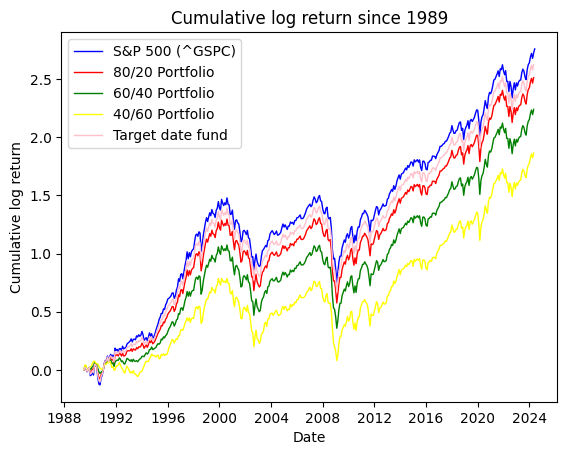

In [215]:
# Plot cummulative returns
def plotLogReturn (key, label, color):
    plt.plot(
        prices_data.index,
        np.log(prices_data[key]) - np.log(prices_data["target_date_fund"][0]),
        label=label,
        color=color,
        linewidth=1,
    )

plotLogReturn("GSPC_N", "S&P 500 (^GSPC)", "blue")
plotLogReturn("80/20_portfolio", "80/20 Portfolio", "red")
plotLogReturn("60/40_portfolio", "60/40 Portfolio", "green")
plotLogReturn("40/60_portfolio", "40/60 Portfolio", "yellow")
plotLogReturn("target_date_fund", "Target date fund","pink")


plt.title(f"Cumulative log return since {startyear}")  # Add title
plt.xlabel("Date")  # Add x-label
plt.ylabel("Cumulative log return")  # Add y-label
plt.legend(loc="upper left")  # Add legend
# plt.savefig("./fig1a.jpg") # Save figure
plt.show()  # Show plot

#### Display annualized rolling mean

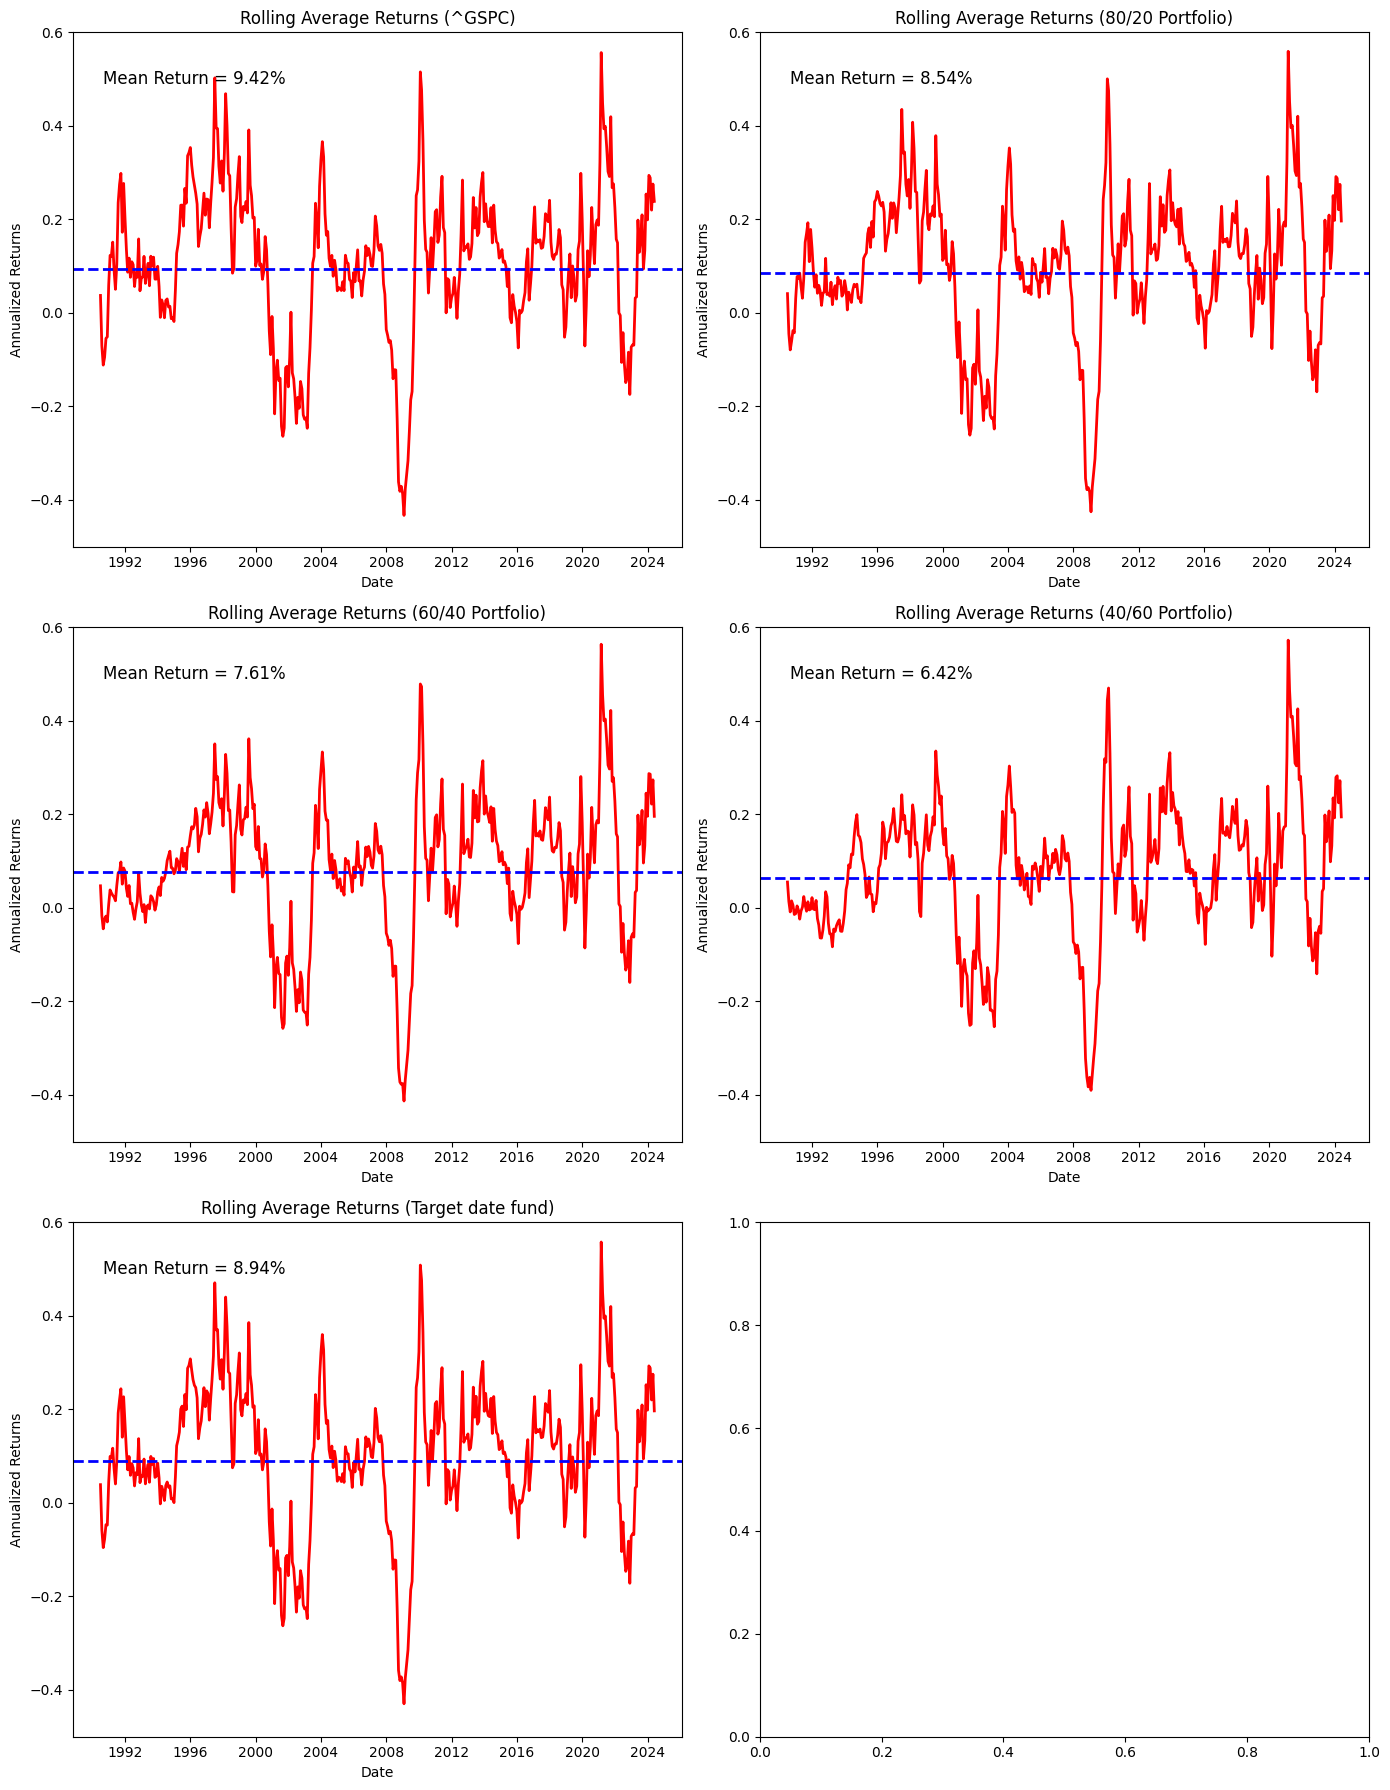

In [204]:
# Set up the figure with two subplots (panels)
fig, ax = plt.subplots(3, 2, figsize=(14, 18))

def plotAnnRollMean (x,y,key,title):
    # Plot Rolling Average Returns for portfolio
    ax[x][y].plot(annualized_rollmean[key], color="red", linewidth=2)
    ax[x][y].set_title(f"Rolling Average Returns ({title})")
    ax[x][y].set_ylim(-0.5, 0.6)
    ax[x][y].set_xlabel("Date")
    ax[x][y].set_ylabel("Annualized Returns")

    # Calculate and plot the mean return as a horizontal line
    data = annualize_return(returns_data[key].mean())
    ax[x][y].axhline(y=data, color="blue", linestyle="--", linewidth=2)
    ax[x][y].text(
        0.05,
        0.9,
        f"Mean Return = {round(data*100, 2)}%",
        transform=ax[x][y].transAxes,
        color="black",
        fontsize=12,
    )

plotAnnRollMean(0, 0, "GSPC_N", "^GSPC")
plotAnnRollMean(0, 1, "80/20_portfolio", "80/20 Portfolio")
plotAnnRollMean(1, 0, "60/40_portfolio", "60/40 Portfolio")
plotAnnRollMean(1, 1, "40/60_portfolio", "40/60 Portfolio")
plotAnnRollMean(2, 0, "target_date_fund", "Target date fund")

# Show plot
plt.tight_layout()
plt.show()

#### Display annualized mean volatility

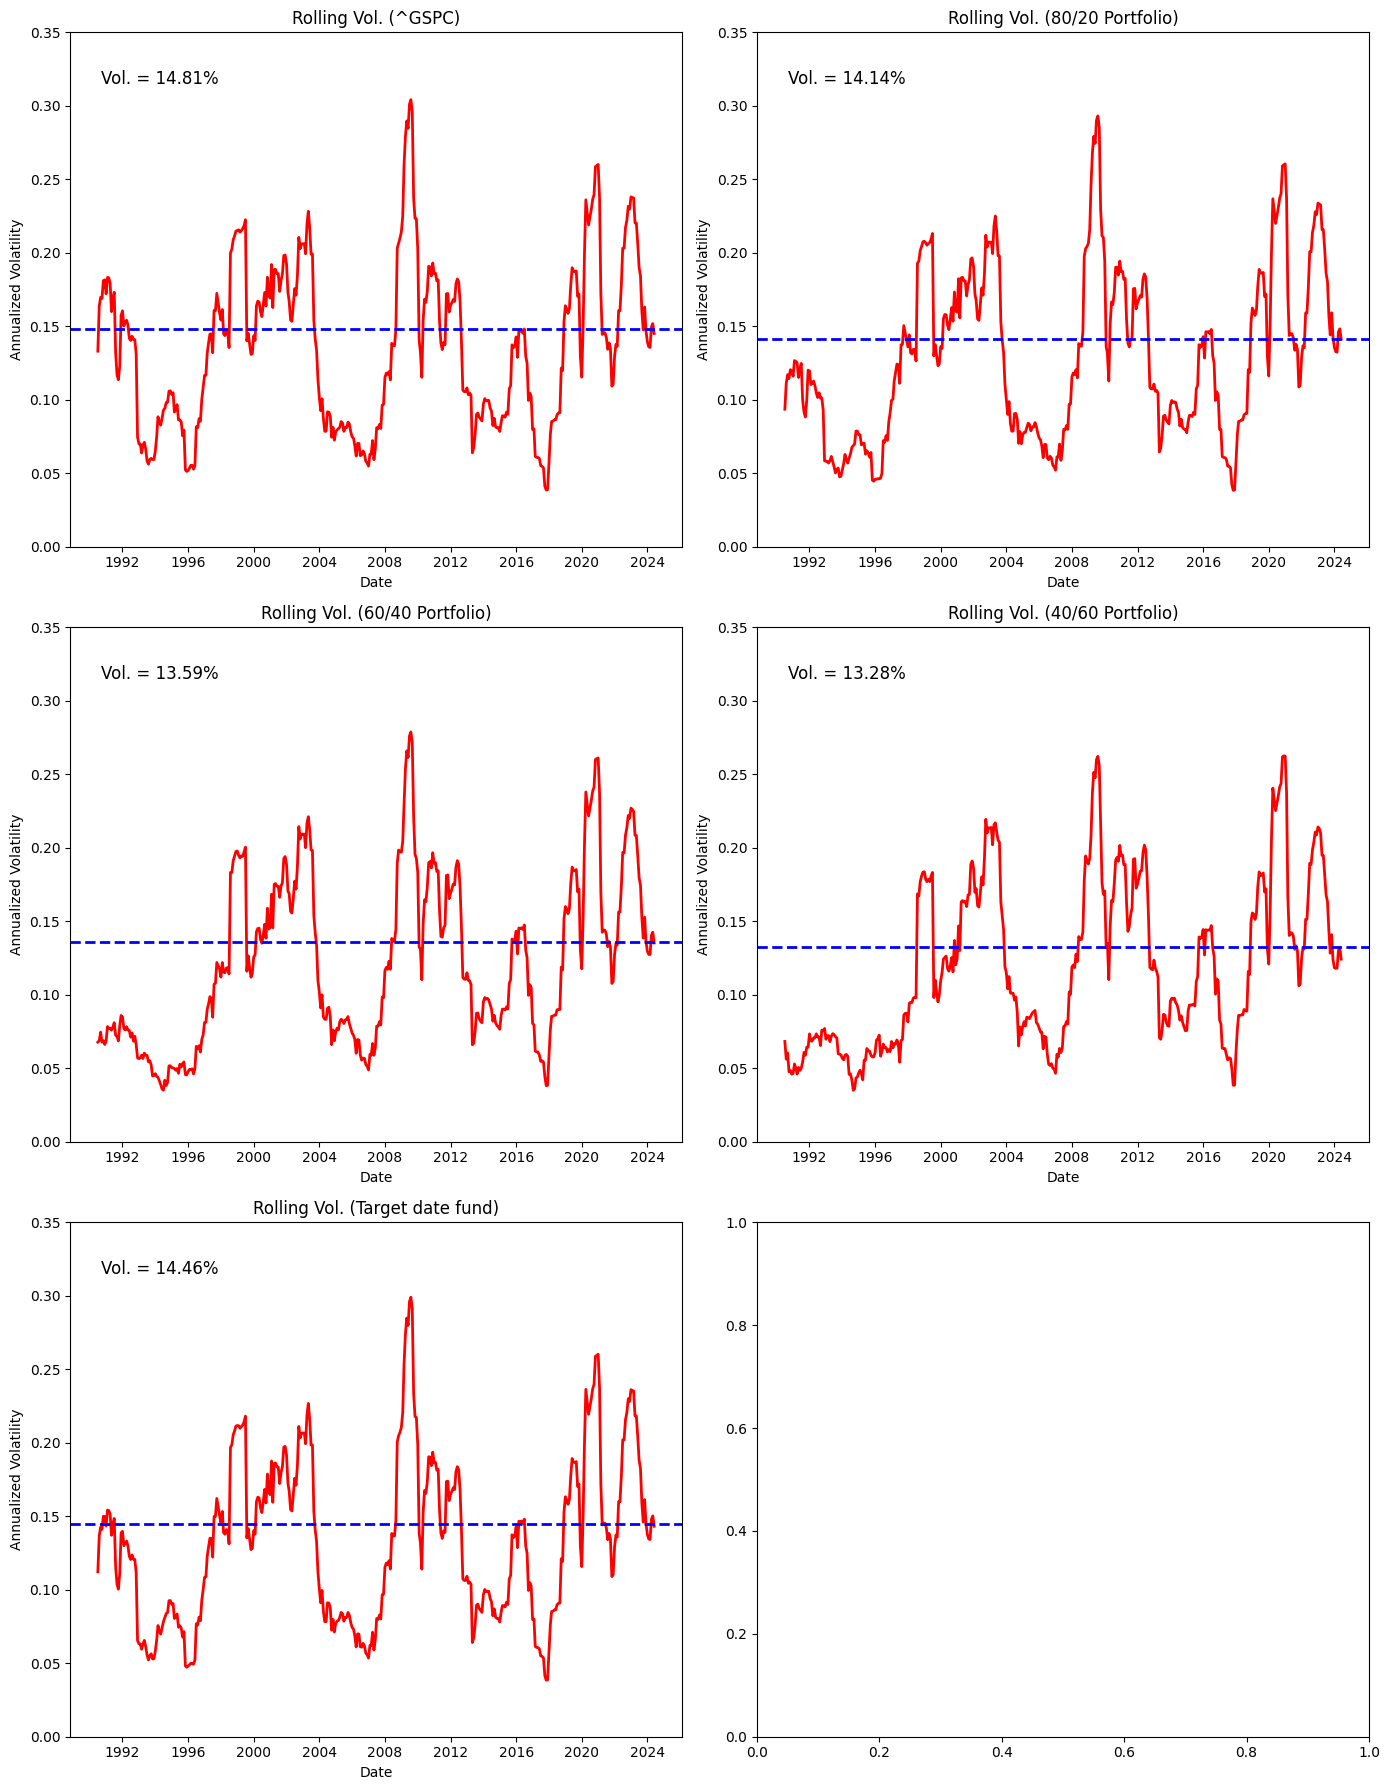

In [207]:
# Set up the figure with two subplots (panels)
fig, ax = plt.subplots(3, 2, figsize=(14, 18))

def plotAnnMeanVol (x,y,key, title):
    # Plot Rolling Volatility for GSPC
    ax[x][y].plot(annualized_rollvol[key], color="red", linewidth=2)
    ax[x][y].set_title(f"Rolling Vol. ({title})")
    ax[x][y].set_ylim(0, 0.35)
    ax[x][y].set_xlabel("Date")
    ax[x][y].set_ylabel("Annualized Volatility")

    # Calculate and plot the mean volatility as a horizontal line
    annualized_vol_GSPC = vol_s(returns_data[key]) * np.sqrt(12)
    ax[x][y].axhline(y=annualized_vol_GSPC, color="blue", linestyle="--", linewidth=2)
    ax[x][y].text(
        0.05,
        0.9,
        f"Vol. = {round(annualized_vol_GSPC*100, 2)}%",
        transform=ax[x][y].transAxes,
        color="black",
        fontsize=12,
    )

plotAnnMeanVol (0,0,"GSPC_N", "^GSPC")
plotAnnMeanVol (0, 1, "80/20_portfolio", "80/20 Portfolio")
plotAnnMeanVol (1, 0, "60/40_portfolio", "60/40 Portfolio")
plotAnnMeanVol (1, 1, "40/60_portfolio", "40/60 Portfolio")
plotAnnMeanVol (2, 0, "target_date_fund", "Target date fund")

# plt.savefig("./fig4.jpg") # Save figure

# Show plot
plt.tight_layout()
plt.show()

#### Display Sharpe ratio

In [221]:
# Assuming that the risk-free rate = 0
print(
    "Sharpe ratio (equity portfolio):",
    round(annualized_mean_GSPC / annualized_vol_GSPC, 2),
)
print(
    "Sharpe ratio (80/20 portfolio):",
    round(annualized_mean_portfolio_80 / annualized_vol_portfolio_80, 2),
)
print(
    "Sharpe ratio (60/40 portfolio):",
    round(annualized_mean_portfolio_60 / annualized_vol_portfolio_60, 2),
)
print(
    "Sharpe ratio (40/60 portfolio):",
    round(annualized_mean_portfolio_60 / annualized_vol_portfolio_60, 2),
)
print(
    "Sharpe ratio (target date fund):",
    round(annualized_mean_target_date_fund / annualized_vol_target_date_fund, 2),
)

Sharpe ratio (equity portfolio): 0.64
Sharpe ratio (80/20 portfolio): 0.6
Sharpe ratio (60/40 portfolio): 0.56
Sharpe ratio (40/60 portfolio): 0.56
Sharpe ratio (target date fund): 0.62
